<a href="https://colab.research.google.com/github/MarcosVeniciu/AEDs/blob/master/Modelos_de_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

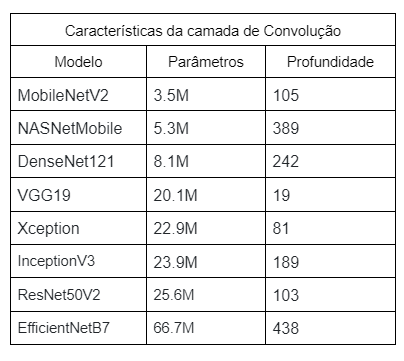






In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
image_size = (180, 180)
input_shape = image_size + (3,)
num_classes = 2
dropout = 0.5

In [3]:
# Aplicando algumas transformações nas imagens, para aumentar o dataset

data_augmentation = keras.Sequential(
    [
        keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        keras.layers.experimental.preprocessing.RandomRotation(0.12),
    ]
)

#Xception

In [37]:
def xception(input_shape, num_classes, dropout):
  base_model = keras.applications.Xception(
    weights=None,  # Os pesos serão inicializados aleatóriamente.
    input_shape=input_shape,
    include_top=False, # Não vai incluir a camada de classificação
  )  

  # freeze the base_model
  base_model.trainable = True # Sendo True vai permitir que os pesos sejam atualizados durante o treinamento

  # Create new model on top
  inputs = keras.Input(shape=input_shape)
  x = data_augmentation(inputs)  # Apply random data augmentation

  # Pre-trained Xception weights requires that input be scaled
  # from (0, 255) to a range of (-1., +1.), the rescaling layer
  # outputs: `(inputs * scale) + offset`
  scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
  x = scale_layer(x)
  
  # The base model contains batchnorm layers. We want to keep them in inference mode
  # when we unfreeze the base model for fine-tuning, so we make sure that the
  # base_model is running in inference mode here.
  x = base_model(x, training=True)
  x = keras.layers.GlobalAveragePooling2D()(x)

  if num_classes == 2:
    activation = "sigmoid"
    units = 1
  else:
    activation = "softmax"
    units = num_classes

  x = keras.layers.Dropout(dropout, name="dropout_2")(x) # Regularize with dropout
  x = keras.layers.Dense(1024, activation='relu')(x)
  x = keras.layers.Dense(512, activation='relu')(x)
  outputs = keras.layers.Dense(units, activation=activation)(x)
  return keras.Model(inputs, outputs)

In [38]:
modelo = xception(input_shape, num_classes, dropout)  
modelo.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_17 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 global_average_pooling2d_14  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                          

# MobileNetV2

In [41]:
def MobileNetV2(input_shape, num_classes, dropout):
  base_model = keras.applications.MobileNetV2(
    weights= None,  # Os pesos serão inicializados aleatóriamente.
    input_shape= input_shape,
    alpha=1.0,
    include_top=False, # Não vai incluir a camada de classificação.
  )

  # Freeze the base_model
  base_model.trainable = True # Sendo True vai permitir que os pesos sejam atualizados durante o treinamento

  inputs = keras.Input(shape = input_shape)
  x = data_augmentation(inputs)  # Apply random data augmentation

  scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
  x = scale_layer(x)

  x = base_model(x, training=True)
  x = keras.layers.GlobalAveragePooling2D()(x)

  if num_classes == 2:
    activation = "sigmoid"
    units = 1
  else:
    activation = "softmax"
    units = num_classes

  x = keras.layers.Dropout(dropout, name="dropout_2")(x) # Regularize with dropout
  x = keras.layers.Dense(640, activation='relu')(x)
  x = keras.layers.Dense(320, activation='relu')(x)
  outputs = keras.layers.Dense(units, activation=activation)(x)
  
  return keras.Model(inputs, outputs)  

In [42]:
modelo = MobileNetV2(input_shape, num_classes, dropout)  
modelo.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_19 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 mobilenetv2_1.00_180 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_16  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0  

# NASNetMobile

In [45]:
def NASNetMobile(input_shape, num_classes, dropout):
  base_model = keras.applications.nasnet.NASNetMobile(
    input_shape=input_shape,
    include_top=False,  # Não vai incluir a camada de classificação.
    weights=None,  # Os pesos serão inicializados aleatóriamente.
  )

  # Freeze the base_model
  base_model.trainable = True # Sendo True vai permitir que os pesos sejam atualizados durante o treinamento

  inputs = keras.Input(shape = input_shape)
  x = data_augmentation(inputs)  # Apply random data augmentation

  scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
  x = scale_layer(x)

  x = base_model(x, training=True)
  x = keras.layers.GlobalAveragePooling2D()(x)

  if num_classes == 2:
    activation = "sigmoid"
    units = 1
  else:
    activation = "softmax"
    units = num_classes

  x = keras.layers.Dropout(dropout, name="dropout_2")(x) # Regularize with dropout
  x = keras.layers.Dense(528, activation='relu')(x)
  x = keras.layers.Dense(264, activation='relu')(x)
  outputs = keras.layers.Dense(units, activation=activation)(x)
  
  return keras.Model(inputs, outputs)  

In [46]:
modelo = NASNetMobile(input_shape, num_classes, dropout)  
modelo.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_39 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_21 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 NASNet (Functional)         (None, 6, 6, 1056)        4269716   
                                                                 
 global_average_pooling2d_18  (None, 1056)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 1056)              0         
                                                          

# DenseNet121

In [49]:
def DenseNet121(input_shape, num_classes, dropout):
  base_model = keras.applications.densenet.DenseNet121(
    include_top=False, # Não vai incluir a camada de classificação.
    weights=None, # Os pesos serão inicializados aleatóriamente.
    input_shape=input_shape,
  )

  # Freeze the base_model
  base_model.trainable = True # Sendo True vai permitir que os pesos sejam atualizados durante o treinamento

  inputs = keras.Input(shape = input_shape)
  x = data_augmentation(inputs)  # Apply random data augmentation

  scale_layer = keras.layers.Rescaling(scale=1./255)
  x = scale_layer(x)

  x = base_model(x, training=True)
  x = keras.layers.GlobalAveragePooling2D()(x)

  if num_classes == 2:
    activation = "sigmoid"
    units = 1
  else:
    activation = "softmax"
    units = num_classes

  x = keras.layers.Dropout(dropout, name="dropout_2")(x) # Regularize with dropout
  x = keras.layers.Dense(512, activation='relu')(x)
  x = keras.layers.Dense(256, activation='relu')(x)
  outputs = keras.layers.Dense(units, activation=activation)(x)
  
  return keras.Model(inputs, outputs)  

In [50]:
modelo = DenseNet121(input_shape, num_classes, dropout)  
modelo.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_43 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_23 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 densenet121 (Functional)    (None, 5, 5, 1024)        7037504   
                                                                 
 global_average_pooling2d_20  (None, 1024)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                          

# InceptionV3

In [53]:
def InceptionV3(input_shape, num_classes, dropout):
  base_model = keras.applications.InceptionV3(
    include_top=False,  # Não vai incluir a camada de classificação.
    weights=None,       # Os pesos serão inicializados aleatóriamente.
    input_shape=input_shape,
  )

  # Freeze the base_model
  base_model.trainable = True # Sendo True vai permitir que os pesos sejam atualizados durante o treinamento

  inputs = keras.Input(shape = input_shape)
  x = data_augmentation(inputs)  # Apply random data augmentation

  scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
  x = scale_layer(x)

  x = base_model(x, training=True)
  x = keras.layers.GlobalAveragePooling2D()(x)

  if num_classes == 2:
    activation = "sigmoid"
    units = 1
  else:
    activation = "softmax"
    units = num_classes

  x = keras.layers.Dropout(dropout, name="dropout_2")(x) # Regularize with dropout
  x = keras.layers.Dense(1024, activation='relu')(x)
  x = keras.layers.Dense(512, activation='relu')(x)
  outputs = keras.layers.Dense(units, activation=activation)(x)
  
  return keras.Model(inputs, outputs)  

In [54]:
modelo = InceptionV3(input_shape, num_classes, dropout)  
modelo.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_47 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_25 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 global_average_pooling2d_22  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                          

# EfficientNetB7

In [61]:
def EfficientNetB7(input_shape, num_classes, dropout):
  base_model = keras.applications.EfficientNetB7(
    include_top=False, # Não vai incluir a camada de classificação.
    weights=None, # Os pesos serão inicializados aleatóriamente.
    input_shape=input_shape,
  )

  # Freeze the base_model
  base_model.trainable = True # Sendo True vai permitir que os pesos sejam atualizados durante o treinamento

  inputs = keras.Input(shape = input_shape)
  x = data_augmentation(inputs)  # Apply random data augmentation

  # For EfficientNet, input preprocessing is included as part of the model (as a Rescaling layer)
  #scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
  #x = scale_layer(x)

  x = base_model(x, training=True)
  x = keras.layers.GlobalAveragePooling2D()(x)

  if num_classes == 2:
    activation = "sigmoid"
    units = 1
  else:
    activation = "softmax"
    units = num_classes

  x = keras.layers.Dropout(dropout, name="dropout_2")(x) # Regularize with dropout
  x = keras.layers.Dense(1280, activation='relu')(x)
  x = keras.layers.Dense(640, activation='relu')(x)
  outputs = keras.layers.Dense(units, activation=activation)(x)
  
  return keras.Model(inputs, outputs)  

In [62]:
modelo = EfficientNetB7(input_shape, num_classes, dropout)  
modelo.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_55 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 efficientnetb7 (Functional)  (None, 6, 6, 2560)       64097687  
                                                                 
 global_average_pooling2d_26  (None, 2560)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 2560)              0         
                                                                 
 dense_78 (Dense)            (None, 1280)              3278080   
                                                          

# VGG 19

In [69]:
def pre_processamento_VGG(dataset):
  return keras.applications.vgg19.preprocess_input(dataset)


def VGG19(input_shape, num_classes, dropout):
  base_model = keras.applications.VGG19(
    include_top=False, # Não vai incluir a camada de classificação.
    weights=None,      # Os pesos serão inicializados aleatóriamente.
    input_shape=input_shape,
  )

  # Freeze the base_model
  base_model.trainable = True # Sendo True vai permitir que os pesos sejam atualizados durante o treinamento

  inputs = keras.Input(shape = input_shape)
  x = data_augmentation(inputs)  # Apply random data augmentation

  # Os dados de entrada já estarão no formato correto, pela função pre_processamento_VGG
  #scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
  #x = scale_layer(x)

  x = base_model(x, training=True)
  x = keras.layers.GlobalAveragePooling2D()(x)

  if num_classes == 2:
    activation = "sigmoid"
    units = 1
  else:
    activation = "softmax"
    units = num_classes

  x = keras.layers.Dropout(dropout, name="dropout_2")(x) # Regularize with dropout
  x = keras.layers.Dense(256, activation='relu')(x)
  x = keras.layers.Dense(128, activation='relu')(x)
  outputs = keras.layers.Dense(units, activation=activation)(x)
  
  return keras.Model(inputs, outputs)  

In [68]:
modelo = VGG19(input_shape, num_classes, dropout)  
modelo.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_61 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_32 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 vgg19 (Functional)          (None, 5, 5, 512)         20024384  
                                                                 
 global_average_pooling2d_29  (None, 512)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                          

# ResNet50V2 

In [57]:
def pre_processamento_ResNet(dataset):
  return keras.applications.resnet_v2.preprocess_input(dataset)


def ResNet50V2(input_shape, num_classes, dropout):
  base_model = keras.applications.ResNet50V2(
    include_top=False, # Não vai incluir a camada de classificação.
    weights=None,      # Os pesos serão inicializados aleatóriamente.
    input_shape=None,
  )

  # Freeze the base_model
  base_model.trainable = True # Sendo True vai permitir que os pesos sejam atualizados durante o treinamento

  inputs = keras.Input(shape = input_shape)
  x = data_augmentation(inputs)  # Apply random data augmentation

  # Os dados de entrada já estarão no formato correto, pela função pre_processamento_ResNet
  #scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
  #x = scale_layer(x)

  x = base_model(x, training=True)
  x = keras.layers.GlobalAveragePooling2D()(x)

  if num_classes == 2:
    activation = "sigmoid"
    units = 1
  else:
    activation = "softmax"
    units = num_classes

  x = keras.layers.Dropout(dropout, name="dropout_2")(x) # Regularize with dropout
  x = keras.layers.Dense(1024, activation='relu')(x)
  x = keras.layers.Dense(512, activation='relu')(x)
  outputs = keras.layers.Dense(units, activation=activation)(x)
  
  return keras.Model(inputs, outputs)  

In [58]:
modelo = ResNet50V2(input_shape, num_classes, dropout)  
modelo.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_51 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_27 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling2d_24  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                          

# Referências

[1] [Lista de modelos disponiveis no keras](https://keras.io/api/applications/#usage-examples-for-image-classification-models)